In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\mouse_data\cleaned_dataset_mouse.csv")

In [3]:
df

,Med_1_mL,Med_2_mL,Virus_Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus_Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus_Present'], dtype='object')

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

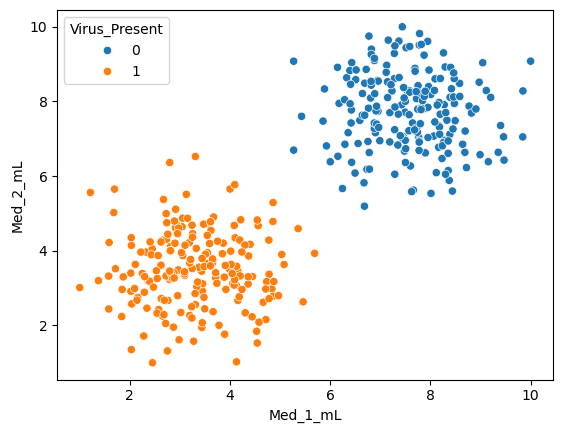

In [6]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus_Present', data = df)

In [7]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus_Present    0
dtype: int64

# X and y

In [8]:
X = df.drop(columns = ['Virus_Present'])
y = df['Virus_Present']

# Train_Test_Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Without Scalling Data

# Hyperarameter Tuning for KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1,10))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator, param_grid, cv = 5, scoring = 'accuracy')

cv_classifier.fit(X_train, y_train)

cv_classifier.best_params_

{'n_neighbors': 1}

# KNN MODEL With Best Hyper Parameter

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

#prediction
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy : ", accuracy_score(y_train, ypred_train))
print("Test accuracy : ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("Cross_val_score : ", cross_val_score(knn, X, y, cv= 5).mean())



Train accuracy :  1.0
Test accuracy :  1.0
Cross_val_score :  1.0


# Confusion metrics

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[36,  0],
       [ 0, 44]], dtype=int64)

# Classification Report

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Prediction on new data